# Log Regression 

This document is dedicated to experimenting log regression models. 

In [1]:
import pandas as pd
# from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
# from sklearn.feature_selection import RFE
import importlib
import sys 
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

sys.path.append("../")

from proj_mod import visualization, data_processing, training 
importlib.reload(visualization);
importlib.reload(data_processing);
importlib.reload(training); 

# from joblib import dump, load
import cloudpickle as cp

seed=420

In [2]:
df=pd.read_csv("../data/raw.csv")
df["y"]=df["y"].map({"no": 0, "yes": 1})
features=df.columns[:-1]
df_feat=df[features]
# df_feat["month_num"]=df_feat["month"].map({"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12}).to_numpy().astype(int)
# df_feat["day_of_year"]=data_processing.day_of_non_leap_np(month_arr=df_feat["month_num"].to_numpy(), day_arr=df_feat["day"].to_numpy()).astype(int)
df_tar=df[["y"]]

## First for all features 

In [3]:
pipe=Pipeline([
    ("data_transform", data_processing.data_transform()), 
    ("data_select", data_processing.data_selector(cut=0.95, how="f score")), 
    ("scaler", StandardScaler()), 
    ("PCA", PCA()),
    ("LR", LogisticRegression(penalty="elasticnet", solver="saga", class_weight="balanced", max_iter=5000)) 
])

param_dict= {
    "LR__C": np.logspace(-3, 2, 10),
    "LR__l1_ratio": [0.2, 0.3, 0.5, 0.7],  
    "PCA__n_components": [0.95, 0.98, 0.99]
}

SKF=StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
outer_split=list(SKF.split(X=df_feat, y=df_tar))

In [4]:
model_eval=training.model_eval(search_method="Random", search_cv_n_jobs=8, searech_verbose=3, random_search_n_iter=20)

In [ ]:
model_eval.eval(df_feat=df_feat, df_tar=df_tar, outer_cv=outer_split, param_dict=param_dict, pipe=pipe)

In [8]:
model_eval.save_dict("../data/fitted/LR/compressed_fitted_dict_LR_run1.gz", compress=True)

Data pickled
Data compressed
Fitted dictionary saved


In [5]:
model_eval.load_dict(load_path="../data/fitted/LR/compressed_fitted_dict_LR_run1.gz", compress=True)

Loading completed. 


In [6]:
model_eval.confusion_data_by_threshold(y=df_tar, outer_cv=outer_split)

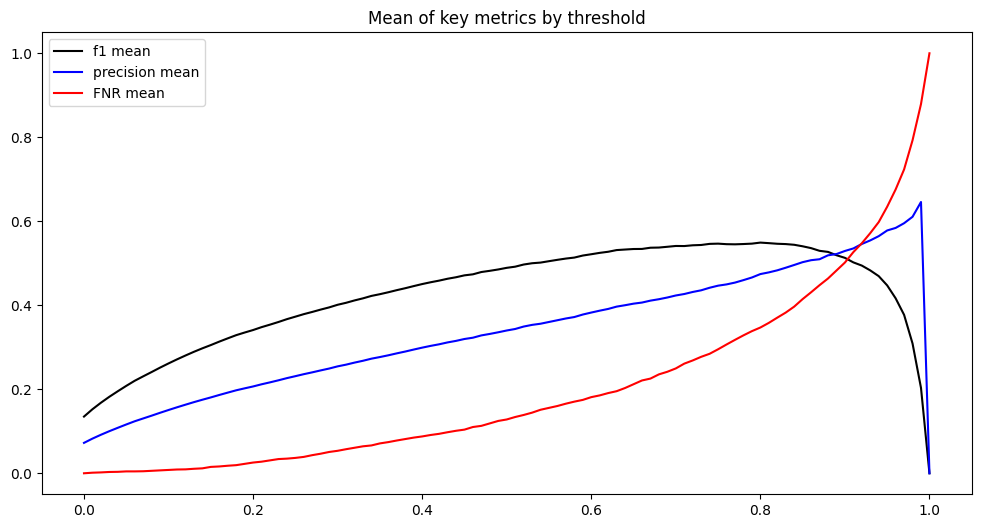

In [7]:
model_eval.create_visual()

In [8]:
model_eval.eval_metrics_

{'f1': np.float64(0.48915130576517596),
 'roc_auc': np.float64(0.936531207006904),
 'ap': np.float64(0.5049220495655703)}

## Then for only the personal features 

In [11]:
pipe=Pipeline([
    ("data_transform", data_processing.data_transform(cam1=False, cam2=False)), 
    ("data_select", data_processing.data_selector(cut=0.95, how="f score")), 
    ("scaler", StandardScaler()), 
    ("PCA", PCA()),
    ("LR", LogisticRegression(penalty="elasticnet", solver="saga", class_weight="balanced", max_iter=5000)) 
])

param_dict= {
    "LR__C": np.logspace(-3, 2, 10),
    "LR__l1_ratio": [0.2, 0.3, 0.5, 0.7],  
    "PCA__n_components": [0.95, 0.98, 0.99]
}

SKF=StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
outer_split=list(SKF.split(X=df_feat, y=df_tar))

In [9]:
model_eval_per=training.model_eval(search_method="Random", search_cv_n_jobs=8, searech_verbose=3, random_search_n_iter=20)

In [ ]:
model_eval_per.eval(df_feat=df_feat, df_tar=df_tar, pipe=pipe, outer_cv=outer_split, param_dict=param_dict)

In [14]:
model_eval_per.save_dict("../data/fitted/LR/compressed_fitted_dict_per_LR_run1.gz", compress=True)

Data pickled
Data compressed
Fitted dictionary saved


In [10]:
model_eval_per.load_dict(load_path="../data/fitted/LR/compressed_fitted_dict_per_LR_run1.gz", compress=True)

Loading completed. 


In [11]:
model_eval_per.confusion_data_by_threshold(y=df_tar, outer_cv=outer_split)

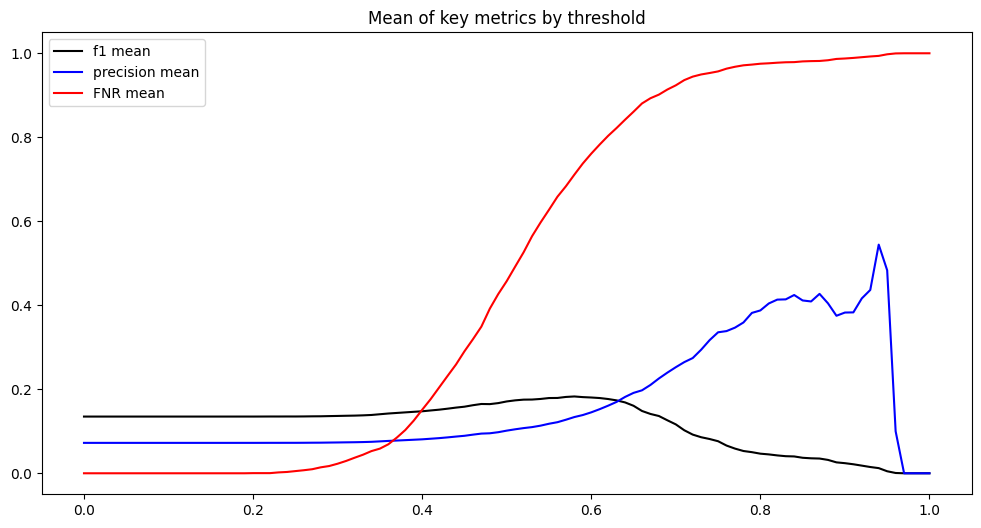

In [12]:
model_eval_per.create_visual()

In [13]:
model_eval_per.eval_metrics_

{'f1': np.float64(0.17104273599680825),
 'roc_auc': np.float64(0.6174890784823752),
 'ap': np.float64(0.13390949892202314)}